In [55]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import chi2
import matplotlib.pyplot as plt
from IPython.display import Image, display
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Upper Limit

## Frequentist upper limit on Poisson parameter
Consider the case of observing n ~ Poisson(s + b).   
Suppose b = 4.5, n_obs = 5, find the upper limit on s at 95% CL.  

### Approach 1: change s each time

In [17]:
b_expected = 4.5  # background expectation
n_observed = 5  # observed number of events

for s_test in range(0, 12):
    n_expected = s_test + b_expected
    # this depends on the alternative hypothesis
    # choose the region towards the alternative hypothesis
    p_value = poisson.cdf(k=n_observed, mu=n_expected)
    if p_value < 0.05:
        print(f"s_up = {s_test-1}")
        break
    print(
        f"s_test = {s_test}, n_expected = {n_expected:4.1f},  p_value = {p_value:6.4f}"
    )

s_test = 0, n_expected =  4.5,  p_value = 0.7029
s_test = 1, n_expected =  5.5,  p_value = 0.5289
s_test = 2, n_expected =  6.5,  p_value = 0.3690
s_test = 3, n_expected =  7.5,  p_value = 0.2414
s_test = 4, n_expected =  8.5,  p_value = 0.1496
s_test = 5, n_expected =  9.5,  p_value = 0.0885
s_test = 6, n_expected = 10.5,  p_value = 0.0504
s_up = 6


### Approach 2: chi2  

In [59]:
alpha = 0.05
b_expected = 4.5  # background expectation
n_observed = 5  # observed number of events
s_up = 0.5 * chi2.ppf(q=1 - alpha, df=2 * (n_observed + 1)) - b_expected
print(f"s_up = {s_up}")

s_up = 6.013034908741535


### Side note: How is the inverse of chi2 here?  

## Different values of b

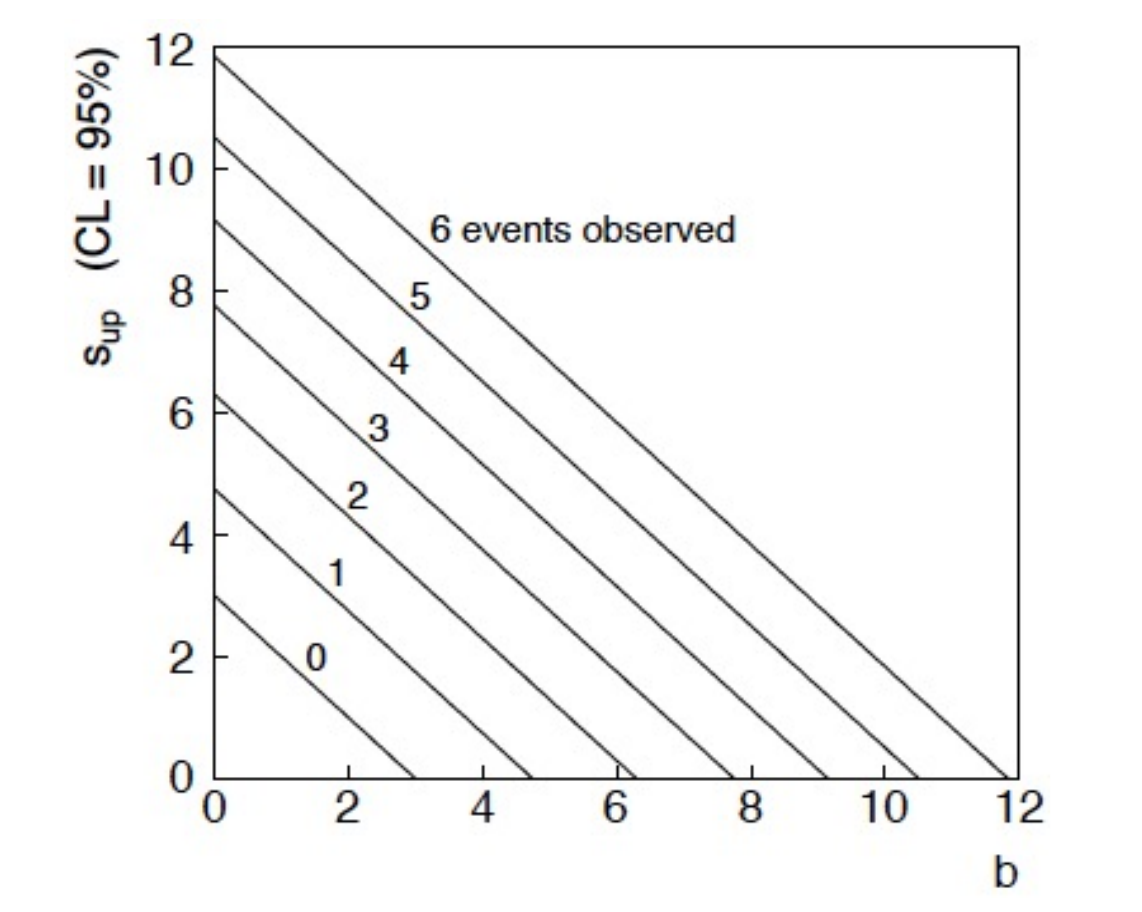

In [22]:
display(Image(filename="images/Poisson(s+b).png", width=400, height=400))

In [26]:
n_observed_all = np.arange(0, 7)
b_expected_all = np.arange(0, 13)

In [60]:
results_n_observed_all = dict.fromkeys(n_observed_all)
for n_observed in n_observed_all:
    results_n_observed_all[n_observed] = []
    for b_expected in b_expected_all:
        p_value = 1
        s_test = 0
        # while p_value > 0.05:
        #     n_expected = s_test + b_expected
        #     p_value = poisson.cdf(k = n_observed, mu = n_expected)
        #     s_test += 1
        #     if p_value <= 0.05:
        #         # print(f"s_up = {s_test-1}")
        #         results_n_observed_all[n_observed].append(s_test-1)
        #         break
        s_up = 0.5 * chi2.ppf(q=1 - alpha, df=2 * (n_observed + 1)) - b_expected
        results_n_observed_all[n_observed].append(s_up)

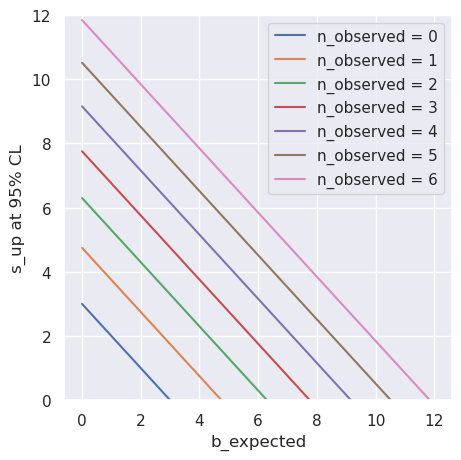

In [62]:
fig, ax = plt.subplots(figsize=(5, 5))
for k, v in results_n_observed_all.items():
    ax.plot(b_expected_all, v, label=f"n_observed = {k}")

ax.set_xlabel("b_expected")
ax.set_ylabel("s_up at 95% CL")
ax.set_ylim(0, 12)
ax.legend()